In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_29/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Naive Bayes

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Problema

Vamos a construir un clasificador que intente predecir si una persona ganará más de US$ 50.000 por año 

Hicimos preparación de los datos en la práctica de checkpoint. Los datasets resultado de esa práctica son el input de ésta. Si no la hicieron, comiencen con esa y después sigan en esta notebook.


## Dataset

https://archive.ics.uci.edu/ml/datasets/Adult

Los datos corresponden a un censo de 1994.

Los campos son

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-

op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [3]:
data_train_location = '../Data/adult_train.csv'
data_test_location = '../Data/adult_test.csv'

data_train = pd.read_csv(data_train_location, sep='\t', low_memory=False)
data_test = pd.read_csv(data_test_location, sep='\t', low_memory=False)

data_train.head(3)

,workclass_State-gov,workclass_Self-emp-not-inc,workclass_Private,workclass_Federal-gov,workclass_Local-gov,workclass_Self-emp-inc,workclass_Without-pay,education_Bachelors,education_HS-grad,education_11th,...,native_country_Ireland,native_country_Hungary,native_country_Holand-Netherlands,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.000000,-1.111697,0.00,0.0,0.0,-5.0,<=50K
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-0.736842,1.477544,-0.25,0.0,0.0,0.0,<=50K
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.157895,0.436143,-0.25,0.0,625.0,-0.4,<=50K


In [4]:
data_test.head(3)

,workclass_State-gov,workclass_Self-emp-not-inc,workclass_Private,workclass_Federal-gov,workclass_Local-gov,workclass_Self-emp-inc,workclass_Without-pay,education_Bachelors,education_HS-grad,education_11th,...,native_country_Ireland,native_country_Hungary,native_country_Holand-Netherlands,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.736842,0.438467,0.00,0.0,0.0,0.0,<=50K
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.057352,0.00,0.0,0.0,3.0,<=50K
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-0.368421,-0.801619,-0.25,0.0,0.0,0.0,<=50K


## Ejercicio 1 - Features Target

Sabiendo que 'income' es el nombre de la columna target, construyamos la matriz de features y el vector target para los conjuntos de train y test

In [5]:
X_train = data_train.drop('income', axis = 1)
X_test = data_test.drop('income', axis = 1)

Y_train = data_train.income
Y_test = data_test.income

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21113, 104)
(9049, 104)
(21113,)
(9049,)


## Ejercicio 2 - Training

Instanciemos y entrenemos uno modelo naive bayes gaussiano.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [6]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

## Ejercicio 3 - Predict

Usemos el modelo entrenado en el ejercicio 2 para predecir la etiqueta de los datos de test

In [7]:
Y_pred = gnb.predict(X_test)

Y_pred

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '>50K', '>50K'],
      dtype='<U5')

## Ejercicio 4 - Performance

Para los datos de test, calculemos accuracy:

Accuracy = (TP + TN)/(TP + TN + FP + FN)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [8]:
# accuracy
accuracy_score(Y_test, Y_pred)

0.8007514642501934

Comparemos la performance que obtuvimos con la performance del modelo nulo.

El modelo nulo es el que predice todas las instancias con la etiqueta de la clase mayoritaria.

In [9]:
# null accuracy

# comparamos la performance del modelo con lo que obtenemos si siempre elegimos la clase mayoritaria como predicción

Y_train.value_counts()

<=50K    15825
>50K      5288
Name: income, dtype: int64

La clase mayoritaria es <=50K.

Calculemos null_acuracy como si en test hubieramos predicho <=50K para todos los registros:

In [10]:
tp = 0
tn = 6829
fp = 0
fn = 2220
null_accuracy = (tp + tn)/(tp + tn + fp + fn)
null_accuracy

0.7546690242015692

Vemos que null accuracy coincide con la proporción de clase mayoritaria, debido a que el modelo nulo de clasificación es predecir la moda.

In [11]:
Y_test.value_counts(normalize=True).max()

0.7546690242015692

Calculemos la matriz de confusión sobre los datos de test y grafiquemos el heatmap de esta matriz.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [12]:
# confusion matrix

conf_mat = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', conf_mat)

print('\nTrue Positives(TP) = ', conf_mat[1,1])

print('\nTrue Negatives(TN) = ', conf_mat[0,0])

print('\nFalse Positives(FP) = ', conf_mat[0,1])

print('\nFalse Negatives(FN) = ', conf_mat[1,0])


Confusion matrix

 [[5446 1383]
 [ 420 1800]]

True Positives(TP) =  1800

True Negatives(TN) =  5446

False Positives(FP) =  1383

False Negatives(FN) =  420


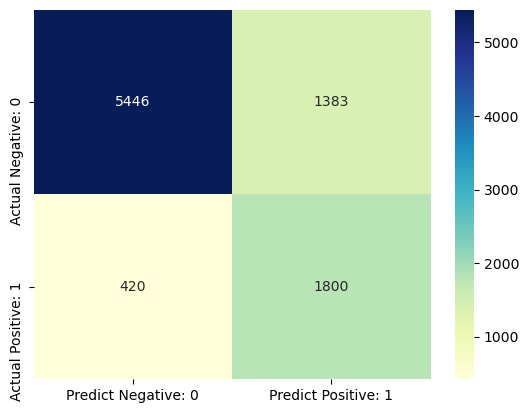

In [15]:
conf_mat_df = pd.DataFrame(data=conf_mat, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
plt.show()